# 04 — Model Evaluation & Interpretation

Detailed evaluation: confusion matrix, ROC curve, precision-recall, and SHAP explanation example.


In [8]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import os
%matplotlib inline


In [9]:
MODEL_PATH = '../models/churn_model.pkl'
PROCESSED = '../data/processed/Telco_Customer_Churn.csv'
obj = joblib.load(MODEL_PATH)
preprocessor = obj['preprocessor']
model = obj['model']
df = pd.read_csv(PROCESSED)
X = df.drop(columns=['Churn'])
y = df['Churn'].apply(lambda x: 1 if str(x).lower() in ['yes','y','true','1'] else 0)
X_t = preprocessor.transform(X)
preds = model.predict(X_t)
probs = model.predict_proba(X_t)[:,1]


C:\Users\Sriraj Yamana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Sriraj Yamana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.7.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Sriraj Yamana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying t

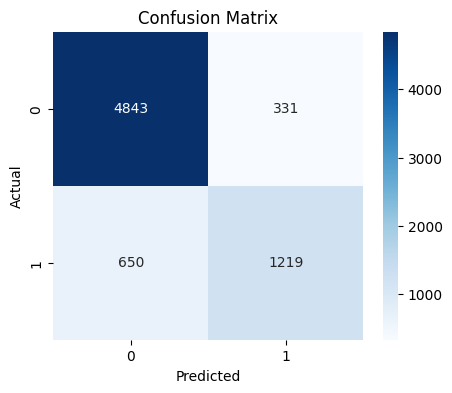

In [4]:
cm = confusion_matrix(y, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


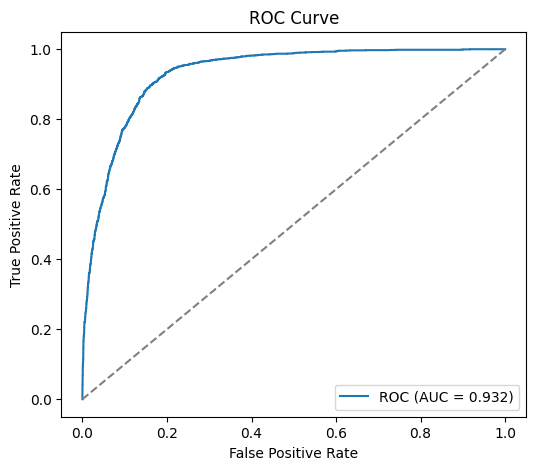

In [5]:
fpr, tpr, _ = roc_curve(y, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


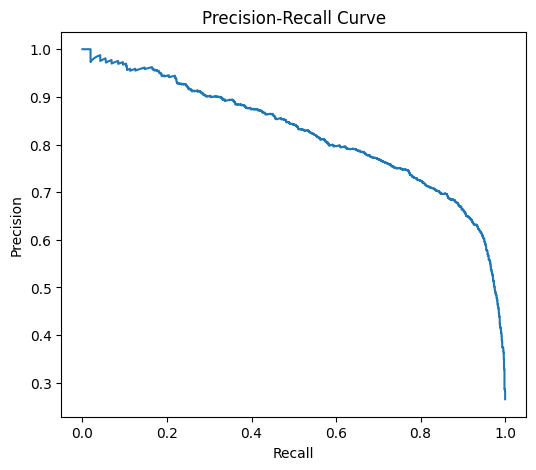

In [6]:
precision, recall, _ = precision_recall_curve(y, probs)
plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### SHAP explanation (optional)
If you have `shap` installed, use the following snippet to compute feature importance and a beeswarm plot. SHAP can be slow on large datasets.


In [7]:
try:
    import shap
    sample_idx = np.random.choice(X_t.shape[0], size=min(200, X_t.shape[0]), replace=False)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_t[sample_idx])
    shap.summary_plot(shap_values, features=X_t[sample_idx])
except Exception as e:
    print('SHAP not available or failed:', e)


SHAP not available or failed: No module named 'shap'


## Next steps
- Investigate threshold tuning to maximize recall or F1 depending on business needs
- Consider class weighting or sampling techniques if positive class is rare
